In [ ]:
import numpy as np
import matplotlib.pyplot as plt

y = np.load('./TadGAN/original_1.npy')
y_hat = np.load('./TadGAN/hat_1.npy')

In [ ]:
y = y.tolist()[0]

In [ ]:
y_hat = y_hat.tolist()[0]

In [ ]:
plt.plot(y)
plt.plot(y_hat)

In [130]:
import csv
import pandas as pd

test_df = pd.read_csv('C:/Users/dk866/Desktop/bearing_test/data/set2_timefeatures.csv')
# test_df = test_df.drop('Unnamed: 0', axis=1)

In [132]:
test_df = test_df['B1_rms']

In [135]:
test_df = pd.DataFrame(test_df)
test_df['anomaly'] = 0

In [139]:
test_df.columns = ['signal', 'anomaly']

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[16, 4])
plt.plot(bearing)

In [1]:

import pandas as pd
import numpy as np
import csv
import os 

path = 'C:/Users/dk866/Desktop/monitoring_system/Data/test_17_gearhead/'

sig = []
for fn in os.listdir(path):
    file = open(path + fn, 'r')
    rea = csv.reader(file)

    for r in rea:
        temp = list(map(float, r))
        
        sig.extend(temp)

sig = np.array(sig)

rms = []
s = []
for i in range(1452):
    s.append(sig[i * 17066 : (i + 1) * 17066])

for l in s:
    t0 = np.sqrt(sum(l ** 2) / 17066)
    rms.append(t0)
dataset = pd.DataFrame(rms)

In [2]:
dataset = dataset.reset_index(drop=True)
dataset['anomaly'] = 0
dataset.columns = ['signal', 'anomaly']

In [3]:

dataset

,signal,anomaly
0,0.045425,0
1,0.046486,0
2,0.039929,0
3,0.038189,0
4,0.039221,0
...,...,...
1447,0.058729,0
1448,0.062495,0
1449,0.058836,0
1450,0.064007,0


In [ ]:
import numpy as np

sig = np.array(sig)
sig.shape

In [ ]:
train = sig[:int(len(sig) * 0.7)]
test = sig[int(len(sig) * 0.7):]

In [ ]:
train = train.reshape(train.shape[0], 1)
test = test.reshape(test.shape[0], 1)

In [ ]:
train.shape, test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

stder = StandardScaler()
stder.fit(train)
x_train = stder.transform(train)
x_test = stder.transform(test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [ ]:
x_train.shape, x_test.shape

In [ ]:
x_train = x_train.reshape(x_train.shape[0])
x_test = x_test.reshape(x_test.shape[0])

In [ ]:
x_train.shape, x_test.shape

In [ ]:
train_df = pd.DataFrame(x_train)
test_df = pd.DataFrame(x_test)

train_df['anomaly'] = 0
test_df['anomaly'] = 0

train_df.columns = ['signal', 'anomaly']
test_df.columns = ['signal', 'anomaly']

In [ ]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
train_df.head

In [ ]:
import numpy as np
window = 430
last = 0
signal = []
for i in range(1, len(bearing) // window):
    temp = np.sqrt(sum(bearing['signal'][last: i * window] ** 2) / window)
    signal.append(temp)
    last = i * window

df = pd.DataFrame()
df['signal'] = signal

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['signal'])

In [ ]:
df['signal'].shape

In [20]:
import torch
from model import Encoder, Decoder, CriticX, CriticZ

encoder = Encoder('./models/encoder.pt').to('cuda:0')
encoder.load_state_dict(torch.load('./models/2000_rms/encoder_1999.pt'))

decoder = Decoder('./models/decoder.pt').to('cuda:0')
decoder.load_state_dict(torch.load('./models/2000_rms/decoder_1999.pt'))

criticz = CriticZ('./models/critic_z.pt').to('cuda:0')
criticz.load_state_dict(torch.load('./models/2000_rms/critic_z_1999.pt'))

criticx = CriticX('./models/critic_x.pt').to('cuda:0')
criticx.load_state_dict(torch.load('./models/2000_rms/critic_x_1999.pt'))

<All keys matched successfully>

In [440]:
rms = pd.DataFrame(pd.read_csv('../monitoring_system/Data/gearhead_time_feature_normalized.csv')['rms'])
skew = pd.DataFrame(pd.read_csv('../monitoring_system/Data/gearhead_time_feature_normalized.csv')['skew'])
test = pd.DataFrame(pd.read_csv('./data/set2_timefeatures.csv')['B1_rms'])
# df = df.drop(['Unnamed: 0'], axis=1)
rms['anomaly'] = 0
rms.columns = ['signal', 'anomaly']
skew['anomaly'] = 0
skew.columns = ['signal', 'anomaly']
test['anomaly'] = 0
test.columns = ['signal', 'anomaly']

In [441]:
rms['signal']

0       0.249376
1       0.427183
2       0.055678
3       0.161223
4       0.123521
          ...   
1447    0.276321
1448    0.276505
1449    0.248850
1450    0.285641
1451    0.284318
Name: signal, Length: 1452, dtype: float64

In [416]:
test

,signal,anomaly
0,0.074180,0
1,0.075382,0
2,0.076228,0
3,0.078726,0
4,0.078475,0
...,...,...
979,0.725019,0
980,0.462021,0
981,0.483847,0
982,0.002103,0


In [417]:
rms = rms.reset_index(drop=True)
skew = skew.reset_index(drop=True)
test = test.reset_index(drop=True)

In [7]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def normalization(signal):
    stder = MinMaxScaler()
    s = np.array(signal.reshape(signal.shape[0], 1))
    stder.fit(s)
    sig = stder.transform(s)
    return sig.reshape(sig.shape[0])

In [418]:
rms['signal'] = normalization(np.array(rms['signal']))
skew['signal'] = normalization(np.array(skew['signal']))
test['signal'] = normalization(np.array(test['signal']))

In [9]:
dataset['signal'] = normalization(np.array(dataset['signal']))

In [13]:
dataset

,signal,anomaly
0,0.310706,0
1,0.335652,0
2,0.181492,0
3,0.140582,0
4,0.164846,0
...,...,...
1447,0.623477,0
1448,0.712019,0
1449,0.625997,0
1450,0.747544,0


In [10]:
class tester(torch.utils.data.Dataset):
    def __init__(self, dataset):
        self.dataset = dataset
        self.columns = self.make_signal_list()
        self.make_rolling_signals()

    def make_signal_list(self):
        signal_list = list()
        for i in range(-50, 50):
            signal_list.append('signal'+str(i))
        return signal_list
        
    def make_rolling_signals(self) -> None:
        """
        Making dataset index as cycle
        """
        for i in range(-50, 50):
            # self.dataset['signal'+str(i)] = self.dataset['signal'].shift(i)
            self.dataset['signal'+ str(i)] = np.roll(self.dataset['signal'], shift=i)
        # drop NaN value and reset index
        # self.dataset = self.dataset.dropna()
        self.dataset = self.dataset.reset_index(drop=True)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        row = self.dataset.loc[idx]
        x = row[self.columns].values.astype(float)
        x = torch.from_numpy(x)
        return {'signal': x, 'anomaly': row['anomaly']}

In [419]:
dataset_rms = tester(rms)
dataset_skew = tester(skew)
dataset_test = tester(test)

C:\Users\dk866\AppData\Local\Temp\ipykernel_29340\2645913103.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.dataset['signal'+ str(i)] = np.roll(self.dataset['signal'], shift=i)
C:\Users\dk866\AppData\Local\Temp\ipykernel_29340\2645913103.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.dataset['signal'+ str(i)] = np.roll(self.dataset['signal'], shift=i)
C:\Users\dk866\AppData\Local\Temp\ipykernel_29340\2645913103.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling

In [15]:
dataset_tester = tester(dataset)

C:\Users\dk866\AppData\Local\Temp\ipykernel_31652\2645913103.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.dataset['signal'+ str(i)] = np.roll(self.dataset['signal'], shift=i)
C:\Users\dk866\AppData\Local\Temp\ipykernel_31652\2645913103.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.dataset['signal'+ str(i)] = np.roll(self.dataset['signal'], shift=i)


In [420]:
rms_dataloader = torch.utils.data.DataLoader(dataset_rms, batch_size=64, drop_last=True)
skew_dataloader = torch.utils.data.DataLoader(dataset_skew, batch_size=64, drop_last=True)
test_dataloader = torch.utils.data.DataLoader(dataset_test, batch_size=64, drop_last=True)

In [16]:
dataset_dataloader = torch.utils.data.DataLoader(dataset_tester, batch_size=64, drop_last=True)

In [367]:
rms_recon = list()
skew_recon = list()
for batch, sample in enumerate(rms_dataloader):
    reconstruction_signal = decoder(encoder(sample['signal']))
    reconstruction_signal = torch.squeeze(reconstruction_signal)
    rms_recon.extend(reconstruction_signal.detach().cpu().numpy())

    
for batch, sample in enumerate(skew_dataloader):
    reconstruction_signal = decoder(encoder(sample['signal']))
    reconstruction_signal = torch.squeeze(reconstruction_signal)
    skew_recon.extend(reconstruction_signal.detach().cpu().numpy())

In [21]:
test_recon = list()
    
for batch, sample in enumerate(dataset_dataloader):
    reconstruction_signal = decoder(encoder(sample['signal']))
    reconstruction_signal = torch.squeeze(reconstruction_signal)
    test_recon.extend(reconstruction_signal.detach().cpu().numpy())

In [422]:
rms_list = pd.DataFrame(rms_recon)
skew_list = pd.DataFrame(skew_recon)
test_list = pd.DataFrame(test_recon)

In [22]:
dataset_list = pd.DataFrame(test_recon)

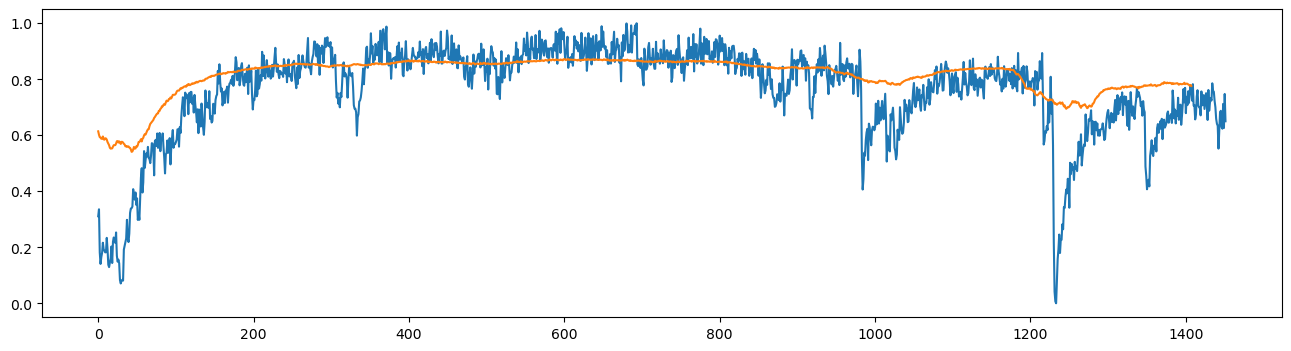

In [23]:
import matplotlib.pyplot as plt

# epoch 0
plt.figure(figsize=[16, 4])
plt.plot(dataset['signal'])
plt.plot(dataset_list[0])
# plt.plot(df['signal'])

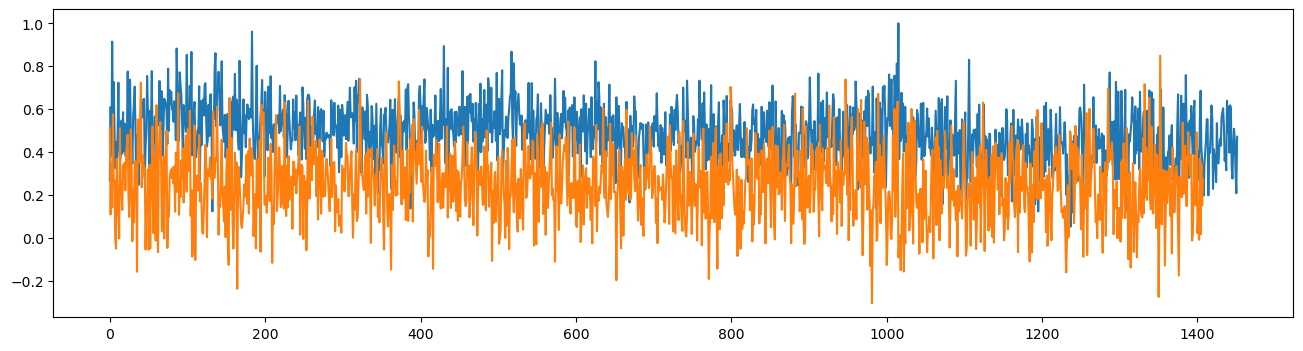

In [468]:
import matplotlib.pyplot as plt

# epoch 0
plt.figure(figsize=[16, 4])
plt.plot(skew['signal'])
plt.plot(skew_list[0])

In [469]:
window_size = 10
mse_list = []
for i in range(len(skew_list[0]) - 10):
    window_original = np.array(rms['signal'][i:i + 10])
    window_recon = np.array(rms_list[0][i:i+10])
    error = 0
    for j in range(window_size):
        error += (window_original[j] - window_recon[j]) ** 2
    mse_list.append(error / window_size)

In [ ]:
mse_list

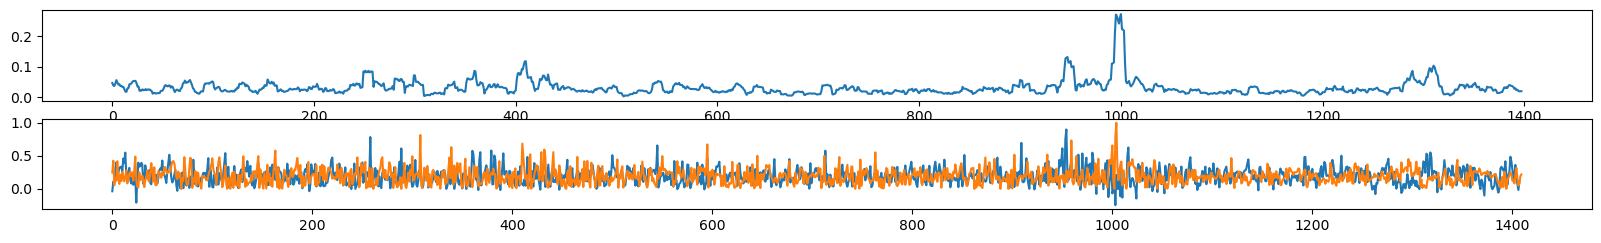

In [470]:
plt.figure(figsize=[20,4])
plt.subplot(311)
plt.plot(mse_list)
plt.subplot(312)
plt.plot(rms_list[0])
# plt.subplot(313)
plt.plot(rms['signal'][:1410])

In [476]:
import math

def reconstruction_errors(y, y_hat, step_size=1, score_window=10, smoothing_window=0.01,
                          smooth=True, rec_error_type='point'):
    """Compute an array of reconstruction errors.

    Compute the discrepancies between the expected and the
    predicted values according to the reconstruction error type.

    Args:
        y (ndarray):
            Ground truth.
        y_hat (ndarray):
            Predicted values. Each timestamp has multiple predictions.
        step_size (int):
            Optional. Indicating the number of steps between windows in the predicted values.
            If not given, 1 is used.
        score_window (int):
            Optional. Size of the window over which the scores are calculated.
            If not given, 10 is used.
        smoothing_window (float or int):
            Optional. Size of the smoothing window, when float it is expressed as a proportion
            of the total length of y. If not given, 0.01 is used.
        smooth (bool):
            Optional. Indicates whether the returned errors should be smoothed.
            If not given, `True` is used.
        rec_error_type (str):
            Optional. Reconstruction error types ``["point", "area", "dtw"]``.
            If not given, "point" is used.

    Returns:
        ndarray:
            Array of reconstruction errors.
    """
    if isinstance(smoothing_window, float):
        smoothing_window = min(math.trunc(len(y) * smoothing_window), 200)

    true = [item[0] for item in y.reshape((y.shape[0], -1))]
    for item in y[-1][1:]:
        true.extend(item)

    predictions = []
    predictions_vs = []

    pred_length = y_hat.shape[1]
    num_errors = y_hat.shape[1] + step_size * (y_hat.shape[0] - 1)

    for i in range(num_errors):
        intermediate = []
        for j in range(max(0, i - num_errors + pred_length), min(i + 1, pred_length)):
            intermediate.append(y_hat[i - j, j])
        if intermediate:
            predictions.append(np.median(np.asarray(intermediate)))

            predictions_vs.append([[
                np.min(np.asarray(intermediate)),
                np.percentile(np.asarray(intermediate), 25),
                np.percentile(np.asarray(intermediate), 50),
                np.percentile(np.asarray(intermediate), 75),
                np.max(np.asarray(intermediate))
            ]])

    true = np.asarray(true)
    predictions = np.asarray(predictions)
    predictions_vs = np.asarray(predictions_vs)

    # Compute reconstruction errors
    if rec_error_type.lower() == "point":
        errors = _point_wise_error(true, predictions)

    elif rec_error_type.lower() == "area":
        errors = _area_error(true, predictions, score_window)

    elif rec_error_type.lower() == "dtw":
        errors = _dtw_error(true, predictions, score_window)

    # Apply smoothing
    if smooth:
        errors = pd.Series(errors).rolling(
            smoothing_window, center=True, min_periods=smoothing_window // 2).mean().values

    return errors, predictions_vs


def _point_wise_error(y, y_hat):
    """Compute point-wise error between predicted and expected values.

    The computed error is calculated as the difference between predicted
    and expected values with a rolling smoothing factor.

    Args:
        y (ndarray):
            Ground truth.
        y_hat (ndarray):
            Predicted values.

    Returns:
        ndarray:
            An array of smoothed point-wise error.
    """
    return abs(y - y_hat)

error, predictions_vs = reconstruction_errors(np.array(rms['signal'][:1408]).reshape(-1, 1), np.array(rms_list[0][:1408]).reshape(-1, 1))

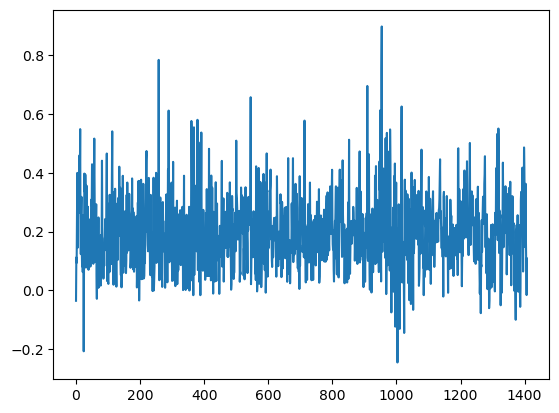

In [467]:
plt.plot((predictions_vs[:, :, 0].reshape(-1)))

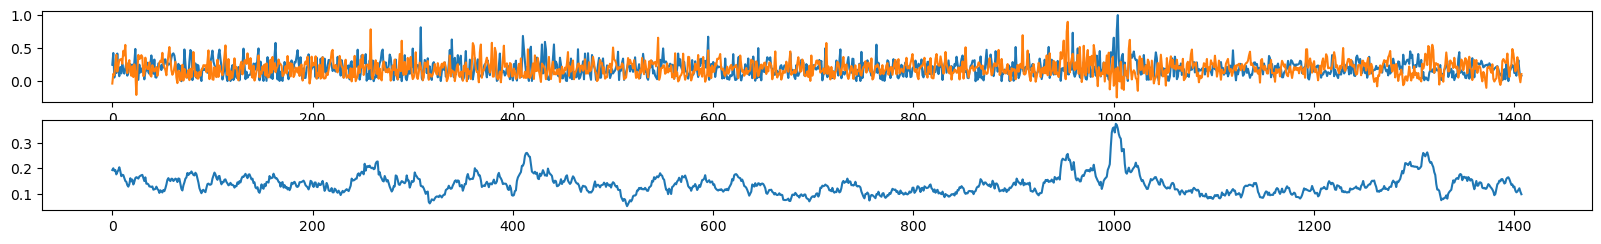

In [477]:
plt.figure(figsize=[20,4])
# plt.subplot(311)
# plt.plot(mse_list)
plt.subplot(312)
plt.plot(rms['signal'][:1408])
plt.plot(rms_list[0])
# plt.subplot(313)
plt.subplot(313)
plt.plot(error)